In [1]:
import numpy as np
import pandas as pd


In [2]:
np.random.seed(42)  #provides random number


In [4]:
apartments=[f"Apt_(i)"for i in range(1,21)]
dates=pd.date_range(start="2025-07-01",periods=30,freq="D")

In [5]:
dates=pd.date_range(start="2025-07-01",periods=30,freq="D")
data={
    "Date":np.tile(dates,len(apartments)),
    "Apartment":np.repeat(apartments,len(dates)),
    "Electricity_usage":np.random.normal(loc=70,scale=5,size=len(dates)*len(apartments))
}
df=pd.DataFrame(data)
df

,Date,Apartment,Electricity_usage
0,2025-07-01,Apt_(i),72.483571
1,2025-07-02,Apt_(i),69.308678
2,2025-07-03,Apt_(i),73.238443
3,2025-07-04,Apt_(i),77.615149
4,2025-07-05,Apt_(i),68.829233
...,...,...,...
595,2025-07-26,Apt_(i),67.449918
596,2025-07-27,Apt_(i),68.650625
597,2025-07-28,Apt_(i),65.106181
598,2025-07-29,Apt_(i),67.778534


In [8]:
df["Electricity_usage"]=df["Electricity_usage"].round(2)


In [7]:
df

,Date,Apartment,Electricity_usage
0,2025-07-01,Apt_(i),72.483571
1,2025-07-02,Apt_(i),69.308678
2,2025-07-03,Apt_(i),73.238443
3,2025-07-04,Apt_(i),77.615149
4,2025-07-05,Apt_(i),68.829233
...,...,...,...
595,2025-07-26,Apt_(i),67.449918
596,2025-07-27,Apt_(i),68.650625
597,2025-07-28,Apt_(i),65.106181
598,2025-07-29,Apt_(i),67.778534


In [9]:
total_usage_per_apartment=df.groupby("Apartment")["Electricity_usage"].sum()
print("\nTotal Electricity usage per Apartment(in 30 days):")
print(total_usage_per_apartment)


Total Electricity usage per Apartment(in 30 days):
Apartment
Apt_(i)    41959.5
Name: Electricity_usage, dtype: float64


In [11]:
print(df.isnull().sum())

Date                 0
Apartment            0
Electricity_usage    0
dtype: int64


In [13]:
print(df.describe())

                      Date  Electricity_usage
count                  600         600.000000
mean   2025-07-15 12:00:00          69.932500
min    2025-07-01 00:00:00          53.790000
25%    2025-07-08 00:00:00          66.530000
50%    2025-07-15 12:00:00          70.040000
75%    2025-07-23 00:00:00          73.112500
max    2025-07-30 00:00:00          89.260000
std                    NaN           4.861071


In [14]:
print(df.dtypes)

Date                 datetime64[ns]
Apartment                    object
Electricity_usage           float64
dtype: object


In [18]:
#Total usage per apartments
usage_per_apartments=df.groupby("Apartment")["Electricity_usage"].sum().sort_values(ascending=False)
print(usage_per_apartments)

Apartment
Apt_(i)    41959.5
Name: Electricity_usage, dtype: float64


In [20]:
daily_avg=df.groupby("Date")["Electricity_usage"].mean()
print(daily_avg.head())

Date
2025-07-01    71.0440
2025-07-02    70.8695
2025-07-03    69.5685
2025-07-04    70.9855
2025-07-05    69.7835
Name: Electricity_usage, dtype: float64


In [21]:
import matplotlib.pyplot as plt

In [22]:
import seaborn as sns


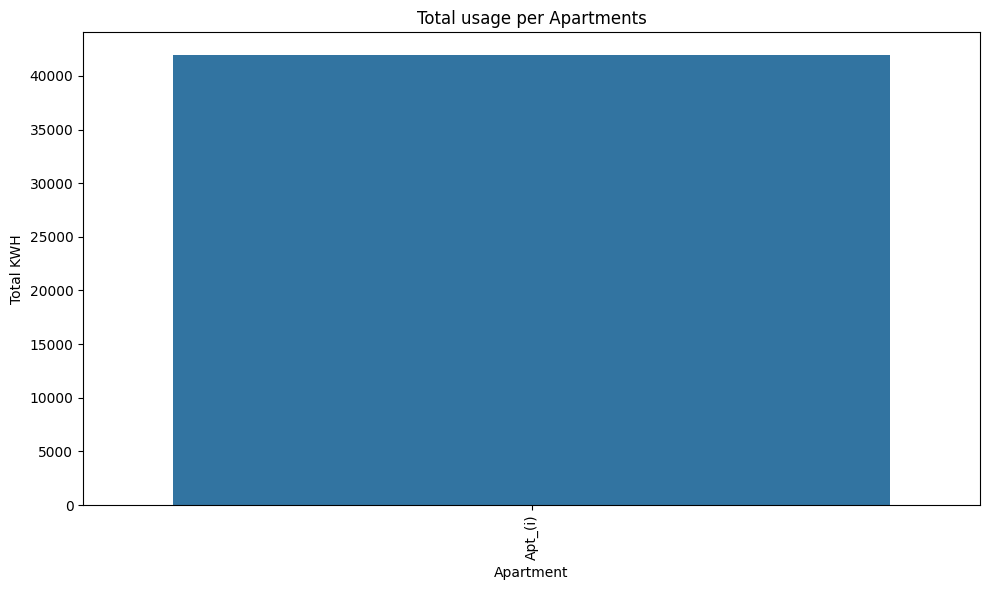

In [25]:
plt.figure (figsize=(10,6))
sns.barplot(x=usage_per_apartments.index,y=usage_per_apartments.values)
plt.xticks(rotation=90)
plt.title("Total usage per Apartments")
plt.xlabel("Apartment")
plt.ylabel("Total KWH")
plt.tight_layout()
plt.show()

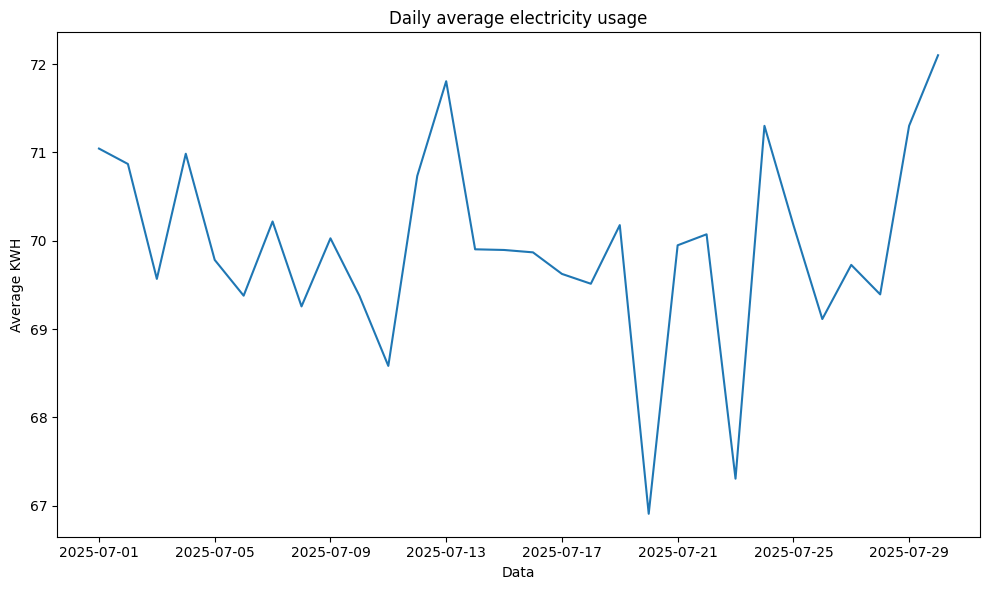

In [26]:

plt.figure(figsize=(10,6))
sns.lineplot(x=daily_avg.index,y=daily_avg.values)
plt.title("Daily average electricity usage")
plt.xlabel("Data")
plt.ylabel("Average KWH")
plt.tight_layout()
plt.show()